# Sufficient statistics for online linear regression

First, I need to recreate the data generating function from [here](https://github.com/probml/pmtk3/blob/master/matlabTools/stats/polyDataMake.m) in Python. See the code for `plot_xy`, `plot_abline`, and `SimpleOnlineLinearRegressor` on [GitHub](https://github.com/ppham27/MLaPP-solutions/blob/master/chap07/linreg.py).

[[  0.           0.58970818]
 [  1.          -0.37281352]
 [  2.          -1.14607496]
 [  3.          -1.84773875]
 [  4.           0.04868206]
 [  5.          -5.85789864]
 [  6.          -3.52953124]
 [  7.          -6.99554646]
 [  8.          -3.50041663]
 [  9.          -1.75733594]
 [ 10.          -6.89197198]
 [ 11.          -2.12255873]
 [ 12.           0.96553503]
 [ 13.           2.73919462]
 [ 14.          -0.83103558]
 [ 15.          -1.76915084]
 [ 16.           3.44591735]
 [ 17.           6.50597623]
 [ 18.           8.19664335]
 [ 19.          10.78080016]
 [ 20.          11.7655227 ]]


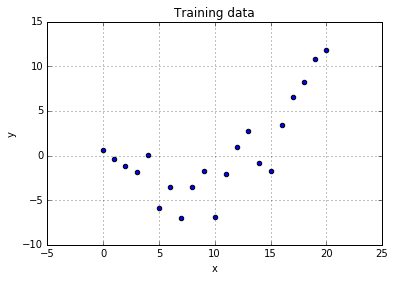

In [1]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from linreg import *

np.random.seed(2016)

def make_data(N):
    X = np.linspace(0, 20, N)
    Y = stats.norm.rvs(size=N, loc=-1.5*X + X*X/9, scale=2)
    return X, Y

X, Y = make_data(21)
print(np.column_stack((X,Y)))
plot_xy(X, Y)
plt.show()

Data is not really linear, but let's just do what the exercise tells us to do. Thus, our model is 

\begin{equation}
y_i \sim \mathcal{N}(w_0 + w_1x_i, \sigma^2),
\end{equation}

or written in vector notation,

\begin{equation}
\mathbf{y} \sim \mathcal{N}\left(w_0\mathbf{1} + w_1\mathbf{x}, \sigma^2I\right).
\end{equation}

Thus, we have that

\begin{align}
p(\mathbf{y} \mid w_0,w_1,\sigma^2,\mathbf{x}) &= \prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2\sigma^2}\left(y_i - w_0 - w_1x_i\right)^2\right) \\
l(w_0,w_1,\sigma^2) = \log p(\mathbf{y} \mid w_0,w_1,\sigma^2,\mathbf{x}) &= -\frac{N}{2}\log(2\pi) - \frac{N}{2}\log(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^N\left(y_i - w_0 - w_1x_i\right)^2.
\end{align}

Let us try to maximize the log-likelihood. We first solve for $w_0$.

\begin{align}
\frac{\partial{l}}{\partial w_0} = \frac{1}{\sigma^2}\sum_{i=1}^N \left(y_i - w_0 - w_1x_i\right)
= \frac{1}{\sigma^2}\left(-Nw_0 + \sum_{i=1}^N y_i - w_1 \sum_{i=1}^Nx_i\right).
\end{align}

Setting $\frac{\partial{l}}{\partial w_0} = 0$ and solving for $w_0$, we find that

\begin{equation}
\hat{w}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{w}_1\frac{\sum_{i=1}^N x_i}{N} = \bar{y} - \hat{w}_1\bar{x}
\end{equation}

Next, we solve for $w_1$. Taking the derivative, we have 

\begin{align}
\frac{\partial{l}}{\partial w_1} = \frac{1}{\sigma^2}\sum_{i=1}^N x_i\left(y_i - w_0 - w_1x_i\right)
= \frac{1}{\sigma^2}\sum_{i=1}^N\left(x_iy_i - w_0x_i - w_1x_i^2\right).
\end{align}

Setting $frac{\partial{l}}{\partial w_1} = 0$ and substituting $\hat{w}_0$ for $w_0$, we have that

\begin{align}
0 &= \frac{1}{\sigma^2}\sum_{i=1}^N\left(x_iy_i - (\bar{y} - \hat{w}_1\bar{x})x_i - \hat{w}_1x_i^2\right) \\
&= \sum_{i=1}^N\left(x_iy_i - x_i\bar{y}\right) -\hat{w}_1\sum_{i=1}^N\left(x_i^2 - x_i\bar{x}\right).
\end{align}

Since $\sum_{i=1}^N x_i = N\bar{x}$, we have that

\begin{align}
0 &= \sum_{i=1}^N\left(x_iy_i - \bar{x}\bar{y}\right) -\hat{w}_1\sum_{i=1}^N\left(x_i^2 - \bar{x}^2\right) \\
\hat{w}_1 &= \frac{\sum_{i=1}^N\left(x_iy_i - \bar{x}\bar{y}\right)}{\sum_{i=1}^N\left(x_i^2 - \bar{x}^2\right)} 
= \frac{\sum_{i=1}^N\left(x_iy_i - x_i\bar{y} -\bar{x}y_i + \bar{x}\bar{y}\right)}{\sum_{i=1}^N\left(x_i^2 - 2x_i\bar{x} + \bar{x}^2\right)} \\
&= \frac{\sum_{i=1}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=1}(x_i - \bar{x})^2} 
= \frac{\frac{1}{N}\sum_{i=1}(x_i - \bar{x})(y_i-\bar{y})}{\frac{1}{N}\sum_{i=1}(x_i - \bar{x})^2},
\end{align}

which is just the MLE for the covariance of $X$ and $Y$ over the variance of $X$. This can also be written as

\begin{equation}
\hat{w}_1 = \frac{\frac{1}{N}\sum_{i=1}(x_i - \bar{x})(y_i-\bar{y})}{\frac{1}{N}\sum_{i=1}(x_i - \bar{x})^2}
= \frac{\sum_{i=1}^N x_iy_i - \frac{1}{N}\left(\sum_{i=1}^Nx_i\right)\left(\sum_{i=1}^Ny_i\right)}{\sum_{i=1}^N x_i^2 - \frac{1}{N}\left(\sum_{i=1}^Nx_i\right)^2}.
\end{equation}

Finally, solving for $\sigma^2$, we have that

\begin{align}
\frac{\partial{l}}{\partial w_1} = -\frac{N}{2\sigma^2} + \frac{1}{2(\sigma^2)^2}\sum_{i=1}^N\left(y_i - \left(w_0 +w_1x_i\right)\right)^2.
\end{align}

Setting this equal to $0$, substituting for $w_0$ and $w_1$, we have that

\begin{align}
\hat{\sigma}^2 &= \frac{1}{N}\sum_{i=1}^N\left(y_i - \left(\hat{w}_0 +\hat{w}_1x_i\right)\right)^2 
= \frac{1}{N}\sum_{i=1}^N\left(y_i^2 - 2y_i\left(\hat{w}_0 +\hat{w}_1x_i\right) + \left(\hat{w}_0 +\hat{w}_1x_i\right)^2\right) \\
&= \hat{w}_0^2 + \frac{1}{N}\left(\sum_{i=1}^Ny_i^2 - 2\hat{w}_0\sum_{i=1}^Ny_i - 2\hat{w}_1\sum_{i=1}^N x_iy_i + 2\hat{w}_0\hat{w}_1\sum_{i=1}^N x_i + \hat{w}_1^2\sum_{i=1}^N x_i^2\right).
\end{align}

Thus, our sufficient statistics are

\begin{equation}
\left(N, \sum_{i=1}^N x_i, \sum_{i=1}^N y_i,\sum_{i=1}^N x_i^2, \sum_{i=1}^N y_i^2, \sum_{i=1}^N x_iy_i\right).
\end{equation}

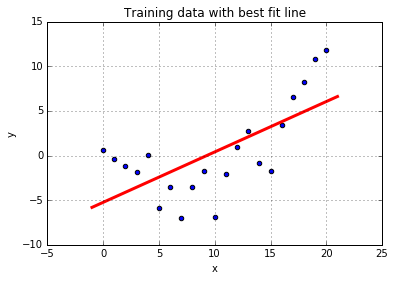

{'variance': 14.653867178568438, 'slope': 0.56461098277743682, 'intercept': -5.2453523797411385}


In [2]:
linReg = SimpleOnlineLinearRegressor()
linReg.fit(X, Y)
## visualize model
plot_xy(X, Y)
plot_abline(linReg.get_params()['slope'], linReg.get_params()['intercept'], 
            np.min(X) - 1, np.max(X) + 1, 
            ax=plt.gca())
plt.title("Training data with best fit line")
plt.show()
print(linReg.get_params())

Now, let's verify that the online version comes to the same numbers.

      w0_est    w1_est        sigma2
2   0.589708 -0.962522  5.551115e-17
3   0.558165 -0.867892  1.989969e-03
4   0.518611 -0.808560  4.425984e-03
5  -0.034252 -0.255698  6.148546e-01
6   0.831492 -0.905006  2.151939e+00
7   0.640597 -0.790469  1.931978e+00
8   0.991074 -0.965707  2.012920e+00
9   0.487981 -0.750096  2.512412e+00
10 -0.167371 -0.504339  3.589896e+00
11  0.061885 -0.580758  3.438736e+00
12 -0.477075 -0.419070  4.190634e+00
13 -1.259338 -0.205725  6.204756e+00
14 -2.021962 -0.015069  8.124291e+00
15 -2.173834  0.019978  7.682029e+00
16 -2.184644  0.022295  7.202434e+00
17 -2.701688  0.125703  8.061967e+00
18 -3.363275  0.249751  9.823081e+00
19 -3.995353  0.361294  1.142120e+01
20 -4.673487  0.474316  1.339856e+01
21 -5.245352  0.564611  1.465387e+01
{'variance': 14.653867178568444, 'slope': 0.5646109827774366, 'intercept': -5.2453523797411368}


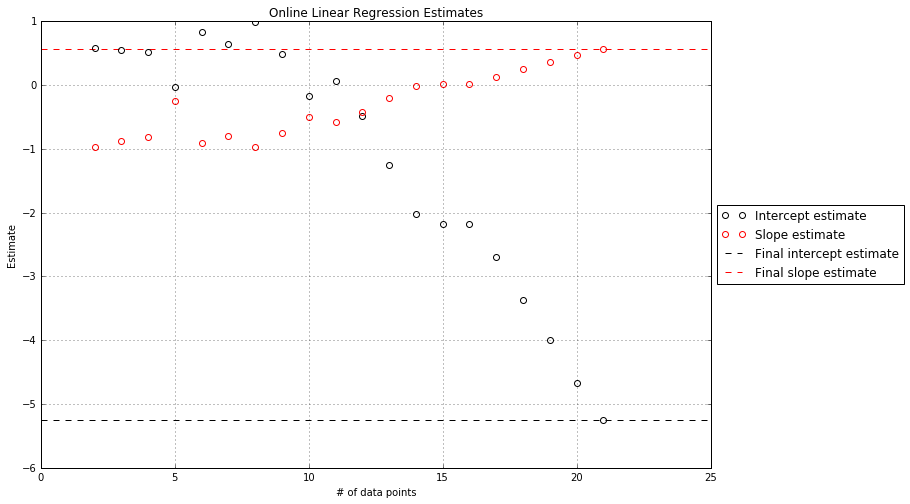

In [3]:
onlineLinReg = SimpleOnlineLinearRegressor()
w_estimates = pd.DataFrame(index=np.arange(2,22), columns=['w0_est', 'w1_est', 'sigma2'], dtype=np.float64)
for i in range(len(Y)):
    onlineLinReg.partial_fit(X[i], Y[i])
    if i >= 1:
        w_estimates.loc[i + 1] = {'w0_est': onlineLinReg.get_params()['intercept'], 
                                  'w1_est': onlineLinReg.get_params()['slope'],
                                  'sigma2': onlineLinReg.get_params()['variance']}
print(w_estimates)
print(onlineLinReg.get_params())
plt.figure(figsize=(12,8))
plt.plot(w_estimates.index, w_estimates['w0_est'], 'o', 
         markeredgecolor='black', markerfacecolor='none', markeredgewidth=1,
         label='Intercept estimate')
plt.plot(w_estimates.index, w_estimates['w1_est'], 'o', 
         markeredgecolor='red', markerfacecolor='none', markeredgewidth=1,
         label='Slope estimate')
plt.grid()
plt.ylabel('Estimate')
plt.xlabel('# of data points')
plt.title('Online Linear Regression Estimates')
plt.hlines(onlineLinReg.get_params()['intercept'], xmin=np.min(X), xmax=np.max(X) + 5, linestyle='--',
           label='Final intercept estimate')
plt.hlines(onlineLinReg.get_params()['slope'], xmin=np.min(X), xmax=np.max(X) + 5, linestyle='--', color='red',
           label='Final slope estimate')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()